In [124]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tdiallo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [142]:
#Step 1
df = pd.read_json('hw-6-dataset2.json', lines=True)

In [148]:
#Step 2
sid = SentimentIntensityAnalyzer()
df['reviewText'] = df['reviewText'].fillna('')
df['sentiment'] = df['reviewText'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [149]:
display(df)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,sentiment
0,5,2,True,"12 11, 2011",AUVPE2KEXBJVT,9539723809,T. E. Kainz,I don't spend a lot on my flags because they r...,Good quality for the price,1323561600,NaN,NaN,0.9514
1,5,NaN,True,"07 30, 2011",A2F6GES1MBOFXS,9539723809,BluesJamJim,"Super fast processing and shipping, if you are...",3'x5' Colorado State flag,1311984000,NaN,NaN,0.8748
2,5,NaN,True,"05 4, 2016",A1SDVD3SZI1BAK,9539723809,Gabriel M Martinez,Great product. I would recommend this product...,Colorado Flag,1462320000,NaN,NaN,0.8442
3,5,NaN,True,"11 2, 2015",A1ZQJ3KCSLUPR3,9539723809,RAJ THE FLASH,GREAT PRICE I LOVE MY STATE AND COUNTRY,RETIRED MILITARY,1446422400,NaN,NaN,0.8519
4,5,NaN,True,"09 1, 2015",ANU8FBZM618M3,9539723809,James R. Mills,Great display flag for the den.,Five Stars,1441065600,NaN,NaN,0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798410,5,NaN,True,"09 6, 2018",AYE6G11DODB4A,B01HJ6NHD4,eml58,Great product at a great price and fast shipping,Five Stars,1536192000,{'Size:': ' L 64*24*48'},NaN,0.8481
798411,4,NaN,True,"08 27, 2018",A1X3HBLFQLPHYV,B01HJ6NHD4,Bob32927,Liked the cover. Covers well and should last ...,Good Cover for money,1535328000,{'Size:': ' L 64*24*48'},NaN,0.5994
798412,5,NaN,True,"10 3, 2018",A3FWXCF60VTX4Y,B01HJATY32,Dave Dunn Wilmer,This is a nice quality grilling table where yo...,EASY TO ASSEMBLE AND WORKS WELL NEXT TO GRILL,1538524800,"{'Color:': ' Espresso Brown', 'Style:': ' Unity'}",NaN,0.9817
798413,5,NaN,True,"02 12, 2018",A3JNRP1X81U8KC,B01HJEAT3C,Bradley Henley,Pulley was shipped as described. Still have th...,Shipped as described,1518393600,NaN,NaN,0.0000


-0.08590290186798052


<Axes: ylabel='Density'>

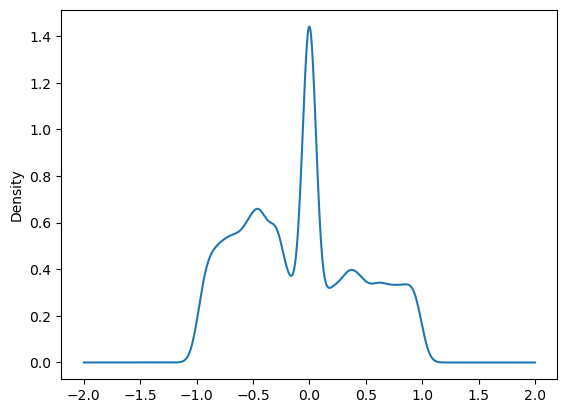

In [150]:
#Step 3
# One Star Sentiment
print(np.mean(df[df['overall'] == 1].sentiment))
df[df['overall'] == 1].sentiment.plot.kde()

0.03307704988886145


<Axes: ylabel='Density'>

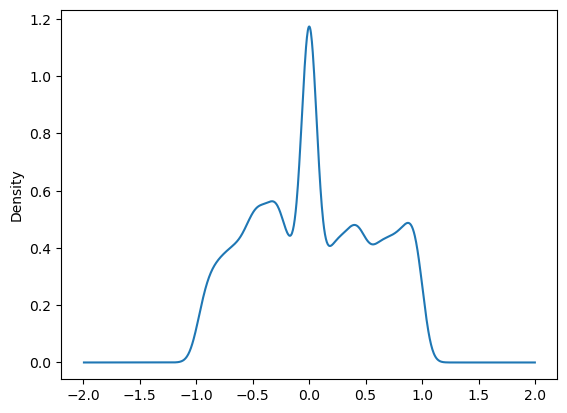

In [151]:
#Two Star Sentiment
print(np.mean(df[df['overall'] == 2].sentiment))
df[df['overall'] == 2].sentiment.plot.kde()

0.20915932318399305


<Axes: ylabel='Density'>

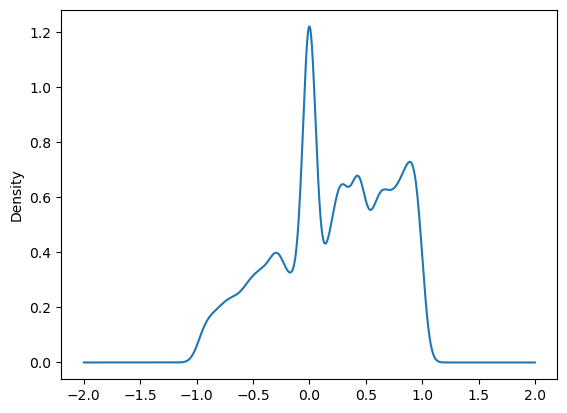

In [152]:
#Three Star Sentiment
print(np.mean(df[df['overall'] == 3].sentiment))
df[df['overall'] == 3].sentiment.plot.kde()

0.4453371385503112


<Axes: ylabel='Density'>

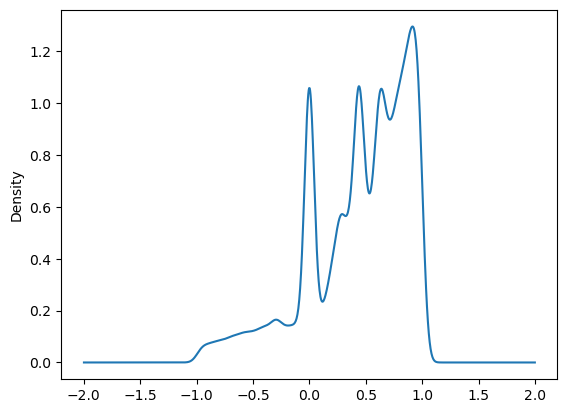

In [153]:
#Four Star Sentiment
print(np.mean(df[df['overall'] == 4].sentiment))
df[df['overall'] == 4].sentiment.plot.kde()

0.5508465619571105


<Axes: ylabel='Density'>

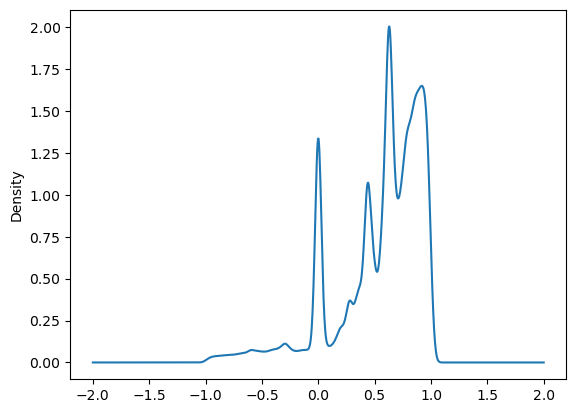

In [154]:
#Five Star Sentiment
print(np.mean(df[df['overall'] ==5].sentiment))
df[df['overall'] == 5].sentiment.plot.kde()

<Axes: ylabel='Density'>

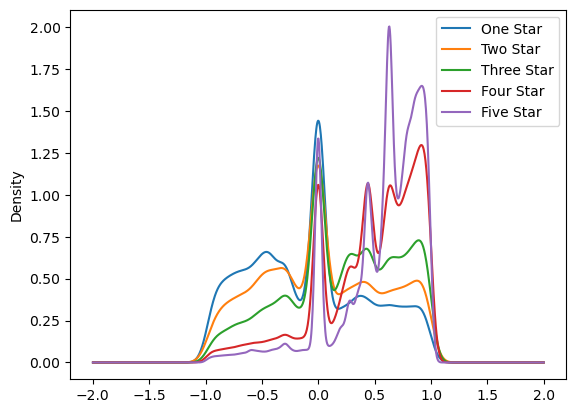

In [155]:
#All plots together
ratings = pd.DataFrame({
    'One Star': df[df['overall'] == 1].sentiment,
    'Two Star': df[df['overall'] == 2].sentiment,
    'Three Star': df[df['overall'] == 3].sentiment,
    'Four Star': df[df['overall'] == 4].sentiment,
    'Five Star': df[df['overall'] == 5].sentiment,
})
ratings.plot.kde()

In [156]:
#Analysis:
"""
We see from the above analysis that on average, higher reviews have more positive 
sentiments with one star reviews having the only average negative sentiment which 
looking at its plot is abovious as it it has more negative sentiments than positive.
Two star reviews on average appear more neutral as their average sentiment is very close 
to zero which evident by its plots which is almost symetric around x equals zero. Furthermore,
we see that as the number of stars increase, the average sentiment becomes more positive with more 
positive sentiment reviews and less negative sentiment reviews. This is seen when looking at all 
plots together.
"""

'\nWe see from the above analysis that on average, higher reviews have more positive \nsentiments with one star reviews having the only average negative sentiment which \nlooking at its plot is abovious as it it has more negative sentiments than positive.\nTwo star reviews on average appear more neutral as their average sentiment is very close \nto zero which evident by its plots which is almost symetric around x equals zero. Furthermore,\nwe see that as the number of stars increase, the average sentiment becomes more positive with more \npositive sentiment reviews and less negative sentiment reviews. This is seen when looking at all \nplots together.\n'